In [1]:
# Voila Web App

## A website built out of a Jupyter notebook using Voila

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

In [ ]:
exit_types = {"loss": {"mix": 0.55, "multiple":0, "exit": 0}, 
              "small": {"mix": 0.2, "multiple":1, "exit": 2}, 
              "base_hit": {"mix": 0.2, "multiple":3, "exit": 5}, 
              "home_run": {"mix": 0.05, "multiple":10, "exit": 10}}

stages = ["seed","grow","hit","explode"]

def compute_evolution(TOTAL_FUND = 3000000, YEARS_FUNDING = 4, fee = 0.02, 
                      first_seed = 60000, second_seed = 120000, pre_money_avg = 700000,
                      pre_money_std = 100000, RESEED_RATE = 0.41,
                      exit_caps = {"seed": 0,"grow": 2000000,"hit": 5000000,"explode":10000000},
                      exit_std = 0.1, conversion_rates = [0.45, 0.6, 0.2] ):
    followon = 0
    returns = []
    companies = []
    for n in range(10000):
        exits = {x: 0 for x in stages}
        fund = TOTAL_FUND*(1-YEARS_FUNDING*fee)
        income = 0
        while (fund>first_seed):
            # seed
            fund = fund - first_seed
            pre_money_value = pre_money_avg + (1-2*np.random.random())*pre_money_std
            ownership = first_seed / (pre_money_value + first_seed)
            cur_stage="seed"
            for stage, conversion_rate in zip(stages[1:],conversion_rates):
                convert = np.random.random() < conversion_rate
                if not convert:
                    exits[cur_stage]=exits[cur_stage]+1
                    exit_value = (1-exit_std/2+exit_std*np.random.random())*exit_caps[cur_stage]
                    income = income + ownership*exit_value
                    break
                else: 
                    cur_stage=stage
                    if cur_stage== "grow" and fund>second_seed and np.random.random() < RESEED_RATE:
                        fund = fund - second_seed
                        followon=followon+1
            if convert:
                exit_value = (0.95+0.1*np.random.random())*exit_caps['explode']
                income = income + ownership*exit_value
                exits["explode"]=exits["explode"]+1
        returns.append(income)
        companies.append(exits)
    print ("Distribucion de compañias")
    print(pd.Series(companies)/10000)
    print ("Total de compañias:",sum(companies.values())/10000)
    print ("Total de follow on:" followon)
    fig = (pd.Series(returns)/3000000).hist(bins=40,density=True)
    plt.show()
    #return { "companies": companies, "followon": followon, "returns": returns}



In [241]:
TOTAL_FUND = 3000000
YEARS_FUNDING = 4
fee = 0.02 

first_seed = 60000
second_seed = 120000

pre_money_avg = 700000
pre_money_std = 100000

RESEED_RATE = 0.35

exit_types = {"loss": {"mix": 0.55, "multiple":0, "exit": 0}, 
              "small": {"mix": 0.2, "multiple":1, "exit": 2}, 
              "base_hit": {"mix": 0.2, "multiple":3, "exit": 5}, 
              "home_run": {"mix": 0.05, "multiple":10, "exit": 10}}

stages = ["seed","grow","hit","explode"]
exit_caps = {"seed": 0,"grow": 2000000,"hit": 5000000,"explode":10000000}
exit_std = 0.1

conversion_rates = [0.45, 0.5555555, 0.2]
conversion_rates = [0.45, 0.6, 0.2]

In [242]:
companies = {x: 0 for x in stages}
followon = 0
returns = []
for n in range(10000):
    fund = TOTAL_FUND*(1-YEARS_FUNDING*fee)
    income = 0
    while (fund>first_seed):
        # seed
        fund = fund - first_seed
        pre_money_value = pre_money_avg + (1-2*np.random.random())*pre_money_std
        ownership = first_seed / (pre_money_value + first_seed)
        cur_stage="seed"
        for stage, conversion_rate in zip(stages[1:],conversion_rates):
            convert = np.random.random() < conversion_rate
            if not convert:
                companies[cur_stage]=companies[cur_stage]+1
                exit_value = (1-exit_std/2+exit_std*np.random.random())*exit_caps[cur_stage]
                income = income + ownership*exit_value
                break
            else: 
                cur_stage=stage
                if cur_stage== "grow" and fund>second_seed and np.random.random() < RESEED_RATE:
                    fund = fund - second_seed
                    followon=followon+1
        if convert:
            exit_value = (0.95+0.1*np.random.random())*exit_caps['explode']
            income = income + ownership*exit_value
            companies["explode"]=companies["explode"]+1
    returns.append(income)
            

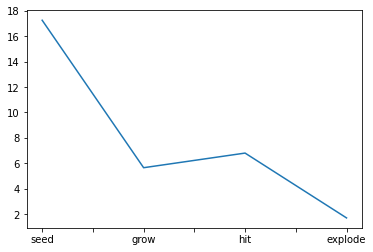

In [243]:
(pd.Series(companies)/10000).plot()

In [244]:
pd.Series(companies)/10000

seed       17.2498
grow        5.6577
hit         6.8073
explode     1.7106
dtype: float64

In [245]:
companies

{'seed': 172498, 'grow': 56577, 'hit': 68073, 'explode': 17106}

In [246]:
c_total = sum(companies.values())/10000
c_total


31.4254

In [247]:
( c_total*(1-conversion_rates[0]),
 c_total*conversion_rates[0]*(1-conversion_rates[1]),
 c_total*conversion_rates[0]*conversion_rates[1]*(1-conversion_rates[2]),
 c_total*conversion_rates[0]*conversion_rates[1]*conversion_rates[2]
)

(17.28397, 5.656572000000001, 6.7878864, 1.6969716)

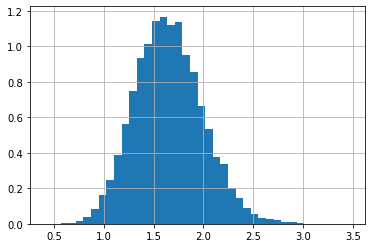

In [248]:
(pd.Series(returns)/3000000).hist(bins=40,density=True)